# Geodesics of $E(2) \ / \ \Gamma$ for different wallpaper groups $\Gamma$

Let $E(2)$ be the group of orientation-preserving isometries on the Euclidean plane $E^2$. In this notebook, we study periodic tilings of $E^2$ by nonoverlapping shapes with no gaps. For a tiling of $E^2$, we define its symmetry group $\Gamma\subseteq E(2)$ to be the subgroup of isometries that map the tiling to itself. 

The **point group** of $\Gamma$: $\Gamma_0 = \{\rho_{\theta}\ | \ (a,\theta)\in \Gamma \text{ for some } a \in \mathbb{R}^2\}$

The **lattice** of $\Gamma$ is $\Gamma_L = \{a\in \mathbb{R}^2\ | \ (a,0)\in \Gamma\}$ 

If $\Gamma$ is the symmetry group of a tiling, one can show that 
1. $\Gamma_0\in \{C_1,C_2,C_3,C_4,C_6\}$ where $C_n = \{\rho_\theta \ | \ \theta = \frac{i \cdot 2 \pi}{n} \text{ for } i = 0,1,2,\ldots, n-1\}$ (we refer to these as the five wallpaper groups).
2. There exists linearly independent $a,b\in \mathbb{R}^2$ such that $\Gamma_L=\{ma+nb \ | \ m,n\in \mathbb{Z}\}$ (we refer to $a$ and $b$ as the lattice generators of $\Gamma$).

For a tiling with symmetry group $\Gamma$, we can build 3-dimensional parameterization of $E(2)\ / \ \Gamma$ that depends on the wallpaper group and the lattice generators. This notebook explores how to define distance on these parameterizations and how this can be used to study the homology of the parameterized space.

In [15]:
# importing needed libraries
import numpy as np
from numpy import pi
from math import dist
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

In [38]:
# defining functions that will allow us to generate orientation-preserving isometries
def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

In [39]:
# helpful functions for analyzing output from ripser, a persistent homology package
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)

# Let's start with a symmetry group whose point group is $C_1$

Note that each isometry is determined by a 2-dimentional translation and a rotation. Suppose $\Gamma$ is a symmetry group of a tiling with lattice generators $a,b\in \mathbb{R}^2$ and point group equal to $C_1$. Then we can parametrize $E(2) \ / \ \Gamma$ with a prism of height $2\pi$ whose base is the parallelogram spanned by $a$ and $b$ with the following identifications:
1. the front and back faces glue together 
2. the right and left faces glue together 
3. the top and bottom faces glue together

Note that this parameterizes the 3-torus. 

To find the distance between any two points $(x,y)$ in this prism, we have to consider 27 different "straight-line" geodesics that pass through various faces. To see this, fix the position of $x$ and consider possible locations of $y$ that could be obtained by duplicating the prism and gluing it to the original prism along one of the identifications. Fixing $\theta=0$, we can translate by $a,$ $-a$, $b,$ $-b$, some combination of these, or not translate at all. Considering $x$ in its original position, and $y$ in one of these translated positions, this corresponds to 9 of the 27 possible straight-lines. We get 9 more when we rotate by $2\pi$ and 9 more again when we rotate by $-2\pi$. We want to take the minimum distance across these 27 candidate distances.

In [53]:
# defining the distance function defined above
def distance_C1(x, y, a, b):
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([y[0] + a * option_a, y[1] + b * option_b, y[2] + 2*pi * option_c])
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [54]:
# function to generate a sample of isometries inside of this prism
def generate_c1_isoms(n_isos, a, b):
    a = list(a * np.random.random(n_isos)) 
    b = list(b * np.random.random(n_isos)) 
    theta = list(2*pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [55]:
# calculate the distance between each of these isometries and save this information in a matrix
# note that we must specifiy values of a and b

isoms = generate_c1_isoms(1000, 6, 6)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],6,6)

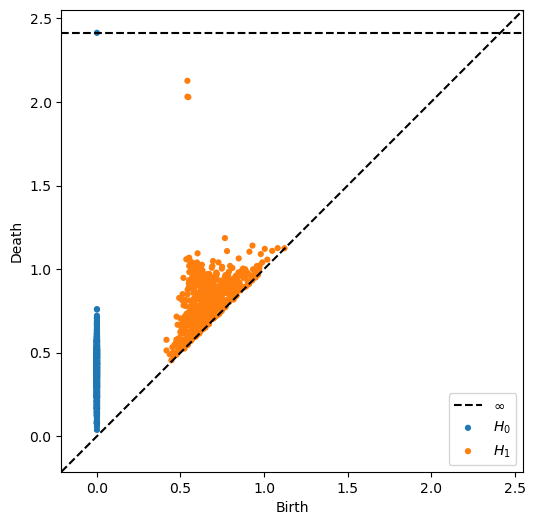

In [49]:
# feed this distance matrix in to ripser to calculate ther persistent homology of the space
# coefficients in Z2
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [50]:
#there are three outliers!
persistent_H1_intervals(output)

[1.5851449370384216,
 1.4900017380714417,
 1.4821116924285889,
 0.5237690210342407,
 0.5164849758148193,
 0.5153790712356567,
 0.5013021230697632,
 0.4922749996185303,
 0.47108161449432373,
 0.4702901244163513,
 0.4670208692550659,
 0.4526676535606384,
 0.45262008905410767,
 0.45072877407073975,
 0.4493442177772522,
 0.4407714009284973,
 0.43237704038619995,
 0.4321402907371521,
 0.43170446157455444,
 0.42960917949676514,
 0.4295666217803955,
 0.4232328534126282,
 0.41961973905563354,
 0.4160415530204773,
 0.4130346179008484,
 0.4049970507621765,
 0.3991485834121704,
 0.397838294506073,
 0.3953571915626526,
 0.39400142431259155,
 0.38619840145111084,
 0.3838132619857788,
 0.3830265402793884,
 0.38200294971466064,
 0.3819214105606079,
 0.3781774044036865,
 0.377419650554657,
 0.37574756145477295,
 0.37450075149536133,
 0.3719552159309387,
 0.3688057065010071,
 0.3654636740684509,
 0.36357027292251587,
 0.3631519675254822,
 0.36178064346313477,
 0.3594791293144226,
 0.35770535469055176,


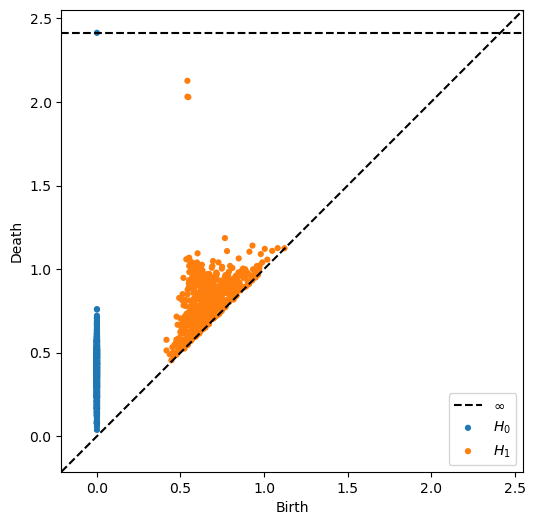

In [51]:
# do it again with coefficients in Z3
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [52]:
# again we find three outliers
persistent_H1_intervals(output)

[1.5851449370384216,
 1.4900017380714417,
 1.4821116924285889,
 0.5237690210342407,
 0.5164849758148193,
 0.5153790712356567,
 0.5013021230697632,
 0.4922749996185303,
 0.47108161449432373,
 0.4702901244163513,
 0.4670208692550659,
 0.4526676535606384,
 0.45262008905410767,
 0.45072877407073975,
 0.4493442177772522,
 0.4407714009284973,
 0.43237704038619995,
 0.4321402907371521,
 0.43170446157455444,
 0.42960917949676514,
 0.4295666217803955,
 0.4232328534126282,
 0.41961973905563354,
 0.4160415530204773,
 0.4130346179008484,
 0.4049970507621765,
 0.3991485834121704,
 0.397838294506073,
 0.3953571915626526,
 0.39400142431259155,
 0.38619840145111084,
 0.3838132619857788,
 0.3830265402793884,
 0.38200294971466064,
 0.3819214105606079,
 0.3781774044036865,
 0.377419650554657,
 0.37574756145477295,
 0.37450075149536133,
 0.3719552159309387,
 0.3688057065010071,
 0.3654636740684509,
 0.36357027292251587,
 0.3631519675254822,
 0.36178064346313477,
 0.3594791293144226,
 0.35770535469055176,


As discussed above, our prism parameterizes the 3-torus, and our persistent homology output is consistent with the 3-torus!

# Now a point group that is $C_2$

Now let $\Gamma\subseteq E(2)$ a symmetry group whose point group is $C_2$. The prism we build to parameterize $E(2) \ / \ \Gamma$  will be similar to that above, but it will have height $\pi$ and the top face is identified with a rotation of the bottom face by $\pi$. This rotation identification slightly complicates where $y$ ends up after duplicating the prism and gluing along faces when a rotation has occured. With these identfications, when we calculate the persistent homology of the parameterized space, we expect to get 3 homology classes in the 1-dimensional homology vector space over $\mathbb{Z}_2$, and 1 homology class in the 1-dimensional homology vector space over $\mathbb{Z}_3.$

In [67]:
def distance_C2(x, y, a, b):
    
    # no rotations
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([y[0] + a * option_a, y[1] + b * option_b, y[2]])
    
    # rotate by pi
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([a - y[0] + a * option_a, b - y[1] + b * option_b, y[2] + pi])
        
    # rotate by -pi
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([a - y[0] + a * option_a, b - y[1] + b * option_b, y[2] - pi])
            
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [68]:
def generate_c2_isoms(n_isos, a, b):
    a = list(a * np.random.random(n_isos)) 
    b = list(b * np.random.random(n_isos)) 
    theta = list(pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [69]:
isoms = generate_c2_isoms(1000, 3, 3)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C2(isoms[i], isoms[j],3,3)

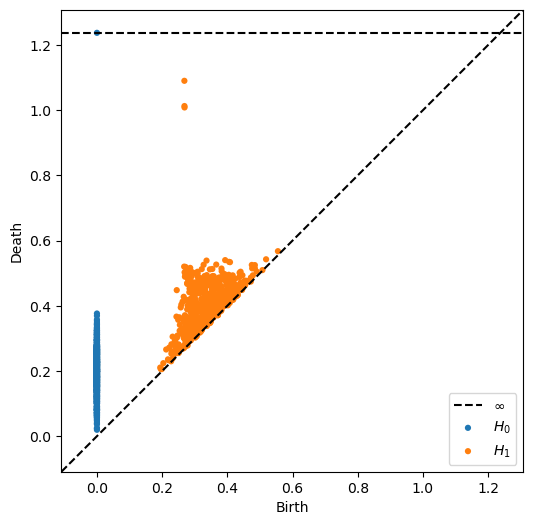

In [70]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [71]:
# three outliers!
persistent_H1_intervals(output)

[0.8220115303993225,
 0.7443406283855438,
 0.7397236824035645,
 0.25264063477516174,
 0.24739935994148254,
 0.23938137292861938,
 0.2355571687221527,
 0.23461371660232544,
 0.23382747173309326,
 0.23338168859481812,
 0.23022639751434326,
 0.23014208674430847,
 0.22679412364959717,
 0.22550126910209656,
 0.22323161363601685,
 0.222244530916214,
 0.2218213975429535,
 0.21968433260917664,
 0.21939194202423096,
 0.2164066731929779,
 0.21331337094306946,
 0.20698481798171997,
 0.20640221238136292,
 0.20493239164352417,
 0.20319411158561707,
 0.20257702469825745,
 0.2013222873210907,
 0.20055794715881348,
 0.1986355483531952,
 0.1984315812587738,
 0.19596362113952637,
 0.1958114206790924,
 0.19503074884414673,
 0.19458237290382385,
 0.1923958659172058,
 0.19227266311645508,
 0.1911678910255432,
 0.19108733534812927,
 0.19004029035568237,
 0.18970414996147156,
 0.18229451775550842,
 0.18014007806777954,
 0.17910265922546387,
 0.17325344681739807,
 0.17308884859085083,
 0.17163711786270142,
 0

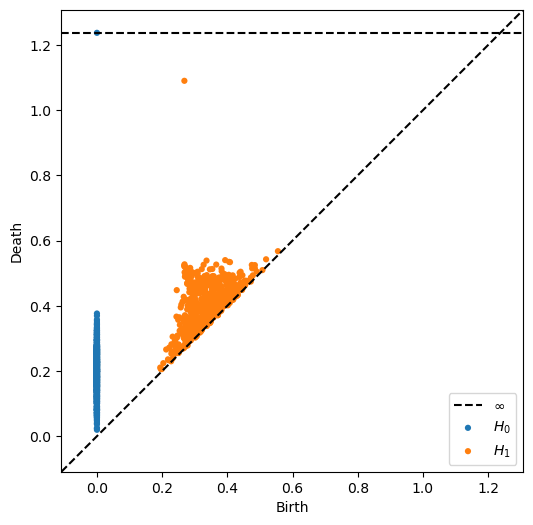

In [72]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [74]:
# one outlier!
persistent_H1_intervals(output)

[0.8220115303993225,
 0.2584921717643738,
 0.2559521496295929,
 0.25169941782951355,
 0.24739935994148254,
 0.23938137292861938,
 0.2355571687221527,
 0.23461371660232544,
 0.23382747173309326,
 0.23338168859481812,
 0.23022639751434326,
 0.23014208674430847,
 0.22679412364959717,
 0.22550126910209656,
 0.22323161363601685,
 0.222244530916214,
 0.2218213975429535,
 0.21968433260917664,
 0.21939194202423096,
 0.2164066731929779,
 0.21331337094306946,
 0.20698481798171997,
 0.20640221238136292,
 0.20493239164352417,
 0.20319411158561707,
 0.20257702469825745,
 0.2013222873210907,
 0.20055794715881348,
 0.1986355483531952,
 0.1984315812587738,
 0.19596362113952637,
 0.1958114206790924,
 0.19503074884414673,
 0.19458237290382385,
 0.1923958659172058,
 0.19227266311645508,
 0.1911678910255432,
 0.19108733534812927,
 0.19004029035568237,
 0.18970414996147156,
 0.18229451775550842,
 0.18014007806777954,
 0.17910265922546387,
 0.17325344681739807,
 0.17308884859085083,
 0.17163711786270142,
 0

# C4

In [389]:
def distance_C4(x, y, a):
    
    # no translation in rotation axis
    Y = []
    options = [-1,0,1]
    for option_1 in options:
        for option_2 in options:
            Y.append([y[0] + a * option_1, y[1] + a * option_2, y[2]])
            
    # translate up 
    options = [-1,0,1]
    for option_1 in options:
        for option_2 in options:
            Y.append([a - y[1] + a * option_1, y[0] + a * option_2, y[2] + pi/2])
    
    # translate down
    options = [-1,0,1]
    for option_1 in options:
        for option_2 in options:
            Y.append([y[1] + a * option_1, -y[0] + a + a * option_2, y[2] - pi/2])
            
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return distances

In [323]:
def generate_c4_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(pi/2 * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [324]:
isoms = generate_c4_isoms(1000, 1, 1)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C4(isoms[i], isoms[j], 1)

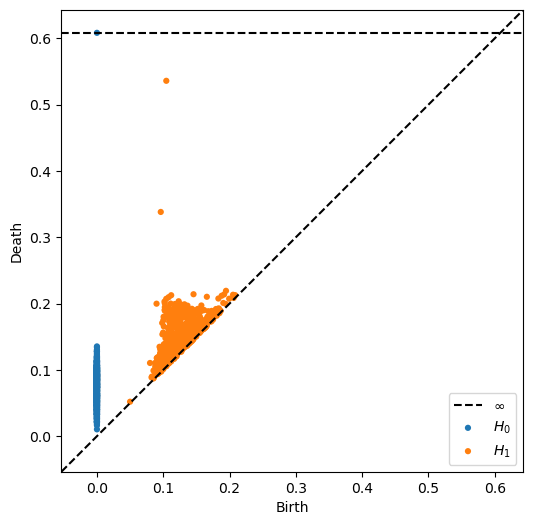

In [297]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [298]:
persistent_H1_intervals(output)

[0.43145930022001266,
 0.24197161942720413,
 0.10996775329113007,
 0.10266460478305817,
 0.10151172429323196,
 0.10115039348602295,
 0.10061172395944595,
 0.09803098440170288,
 0.09229226410388947,
 0.08927899599075317,
 0.08881209790706635,
 0.0883900597691536,
 0.08800047636032104,
 0.08711761236190796,
 0.08654879778623581,
 0.086258165538311,
 0.08561311662197113,
 0.08173433691263199,
 0.08051276206970215,
 0.08026067912578583,
 0.07992339879274368,
 0.07992292940616608,
 0.07977373152971268,
 0.0795656368136406,
 0.07799243181943893,
 0.07762202620506287,
 0.07707703113555908,
 0.07633218169212341,
 0.07627137005329132,
 0.07591193169355392,
 0.07513418793678284,
 0.074759840965271,
 0.07445330917835236,
 0.07393059134483337,
 0.07316078245639801,
 0.0723579153418541,
 0.07211698591709137,
 0.0720229372382164,
 0.07119562476873398,
 0.07073801755905151,
 0.07024005055427551,
 0.06943445652723312,
 0.06843152642250061,
 0.06744575500488281,
 0.06741269677877426,
 0.067336037755012

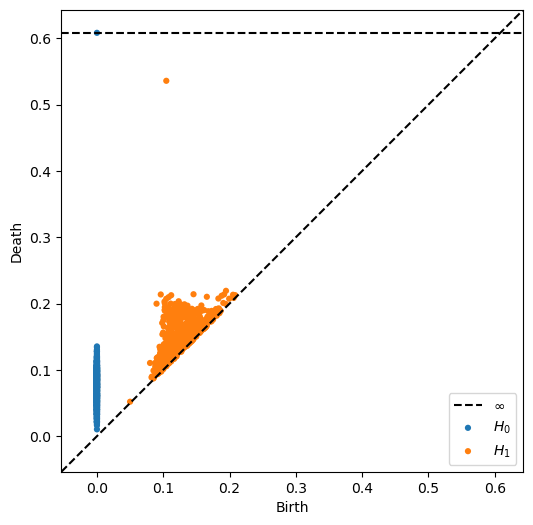

In [299]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [300]:
persistent_H1_intervals(output)

[0.43145930022001266,
 0.11749079078435898,
 0.10996775329113007,
 0.10266460478305817,
 0.10151172429323196,
 0.10115039348602295,
 0.10061172395944595,
 0.09803098440170288,
 0.09229226410388947,
 0.08927899599075317,
 0.08881209790706635,
 0.0883900597691536,
 0.08800047636032104,
 0.08711761236190796,
 0.08654879778623581,
 0.086258165538311,
 0.08561311662197113,
 0.08173433691263199,
 0.08051276206970215,
 0.08026067912578583,
 0.07992339879274368,
 0.07992292940616608,
 0.07977373152971268,
 0.0795656368136406,
 0.07799243181943893,
 0.07762202620506287,
 0.07707703113555908,
 0.07633218169212341,
 0.07627137005329132,
 0.07591193169355392,
 0.07513418793678284,
 0.074759840965271,
 0.07445330917835236,
 0.07393059134483337,
 0.07316078245639801,
 0.0723579153418541,
 0.07211698591709137,
 0.0720229372382164,
 0.07119562476873398,
 0.07073801755905151,
 0.07024005055427551,
 0.06943445652723312,
 0.06843152642250061,
 0.06744575500488281,
 0.06741269677877426,
 0.067336037755012

# C3

In [406]:
def distance_C3(x, y, a):
    
    # no translation in rotation axis
    Y = [y] # no translation in any axis
    for i in [1,-1]:
        Y.append((y[0] + i * (3**0.5) * a, y[1], y[2])) # front and back
        Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
        Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
        
    # translate up 
    Y.append((1/2 * y[0] + 3/2 * a - (3**0.5)/2 * y[1], 1/2 * y[1] + (3**0.5)/2 * y[0] - (3**0.5)/2 * a, y[2] + 2*pi/3)) # only rotation by 2pi/3
    for i in [1,-1]:
        y1 = 1/2 * y[0] + 3/2 * a - (3**0.5)/2 * y[1]
        y2 = 1/2 * y[1] + (3**0.5)/2 * y[0] - (3**0.5)/2 * a
        Y.append((y1 + i * (3**0.5) * a, y2, y[2] + 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    
    
    # translate down 
    Y.append((1/2 * y[0] + 3/2 * a + (3**0.5)/2 * y[1], 1/2 * y[1] - (3**0.5)/2 * y[0] + (3**0.5)/2 * a, y[2] - 2*pi/3)) # only rotation by -2pi/3
    for i in [1,-1]:
        y1 = 1/2 * y[0] + 3/2 * a + (3**0.5)/2 * y[1]
        y2 = 1/2 * y[1] - (3**0.5)/2 * y[0] + (3**0.5)/2 * a
        Y.append((y1 + i * (3**0.5) * a, y2, y[2] - 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [403]:
len(distance_C3((0.5,0.5,pi/5), (1.5,1.5,2*pi/4), 1))

21

In [375]:
def distance_C3(x, y, a):
    
    # no translation in rotation axis
    Y = []
    options = [-1,0,1]
    for option_1 in options: # front and back translation
        for option_2 in options: # LB and RF translation
            for option_3 in options: # LF and RB translation
                Y.append([y[0] + (option_1 * (3**0.5) * a) + (option_2 * (3/2) * a) + (option_3 * (3/2) * a) , y[1] + (option_2 * (-(3**0.5)/2) * a) + (option_3 * ((3**0.5)/2) * a) , y[2]])
            
    # translate up 
    options = [-1,0,1]
    for option_1 in options:
        for option_2 in options:
            for option_3 in options: # LF and RB translation
                y1 = 1/2 * y[0] + 3/2 * a - (3**0.5)/2 * y[1]
                y2 = 1/2 * y[1] + (3**0.5)/2 * y[0] - (3**0.5)/2 * a
                Y.append([y1 + (option_1 * (3**0.5) * a) + (option_2 * (3/2) * a) + (option_3 * (3/2) * a) , y2 + (option_2 * (-(3**0.5)/2) * a) + (option_3 * ((3**0.5)/2) * a) , y[2] + 2*pi/3])
    
    # translate down
    options = [-1,0,1]
    for option_1 in options: # front and back translation
        for option_2 in options: # LB and RF translation
            for option_3 in options: # LF and RB translation
                y1 = 1/2 * y[0] + 3/2 * a + (3**0.5)/2 * y[1]
                y2 = 1/2 * y[1] - (3**0.5)/2 * y[0] + (3**0.5)/2 * a
                Y.append([y1 + (option_1 * (3**0.5) * a) + (option_2 * (3/2) * a) + (option_3 * (3/2) * a) , y2 + (option_2 * (-(3**0.5)/2) * a) + (option_3 * ((3**0.5)/2) * a) , y[2] -2*pi/3])
            
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [407]:
def generate_c3_isoms(n_isos, a):
    X = list(2 * a * np.random.random(2 * n_isos))  
    Y = list((3**0.5) * a * np.random.random(2 * n_isos))
    theta = list(2*pi/3 * np.random.random(2 * n_isos))
    
    i = 0
    hexagon = []
    while len(hexagon) < n_isos:
        if (Y[i] > (3**0.5)/2 * a - (3**0.5) * X[i]) and (Y[i] > (-3*(3**0.5)/2) * a + (3**0.5) * X[i]) and (Y[i] < (3**0.5)/2 * a + (3**0.5) * X[i]) and (Y[i] < (5*(3**0.5)/2) * a - (3**0.5) * X[i]):
            hexagon.append((X[i], Y[i], theta[i]))
        i = i + 1
    
    return hexagon

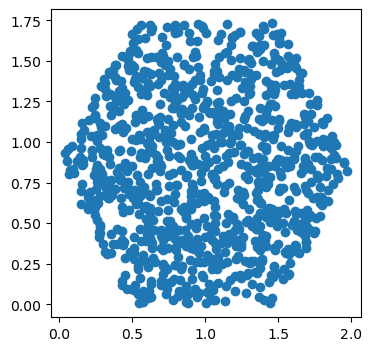

In [396]:
hexagon = generate_c3_isoms(1000, 1)

X = []
Y = []
for i in range(len(hexagon)):
    X.append(hexagon[i][0])
    Y.append(hexagon[i][1])

fig = plt.figure(figsize = (4, 4))
ax = plt.axes()
ax.scatter(X, Y)
plt.show()

In [418]:
isoms = generate_c3_isoms(1000, .5)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C3(isoms[i], isoms[j], .5)

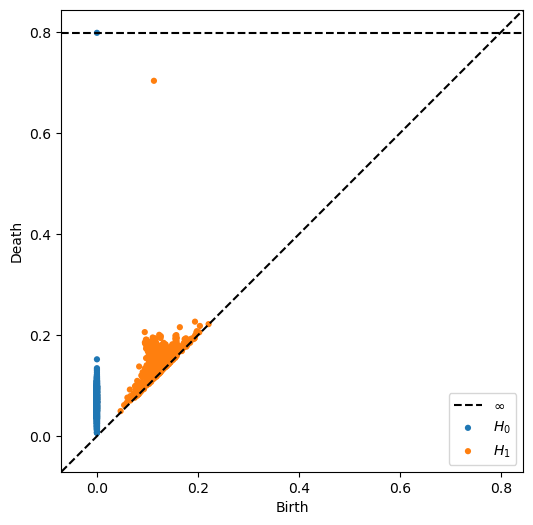

In [419]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [420]:
persistent_H1_intervals(output)

[0.5910786241292953,
 0.11148039996623993,
 0.09434332698583603,
 0.0923442542552948,
 0.09087872505187988,
 0.08845731616020203,
 0.08654621988534927,
 0.08504657447338104,
 0.08423618227243423,
 0.08384352922439575,
 0.08068644255399704,
 0.08026118576526642,
 0.07980623096227646,
 0.07977531850337982,
 0.07911524921655655,
 0.07826736569404602,
 0.07746948301792145,
 0.07654601335525513,
 0.07645555585622787,
 0.07542330771684647,
 0.07437852770090103,
 0.07352486997842789,
 0.07341818511486053,
 0.07225815206766129,
 0.07165007293224335,
 0.07150071859359741,
 0.07118377834558487,
 0.07092811167240143,
 0.07069316506385803,
 0.07061690092086792,
 0.06992855668067932,
 0.06986875832080841,
 0.0690881758928299,
 0.0687815472483635,
 0.06874558329582214,
 0.06864838302135468,
 0.06838715076446533,
 0.06801089644432068,
 0.06768380105495453,
 0.06736278533935547,
 0.06717967242002487,
 0.06682610511779785,
 0.06653878837823868,
 0.06651916354894638,
 0.06571029126644135,
 0.06530795991

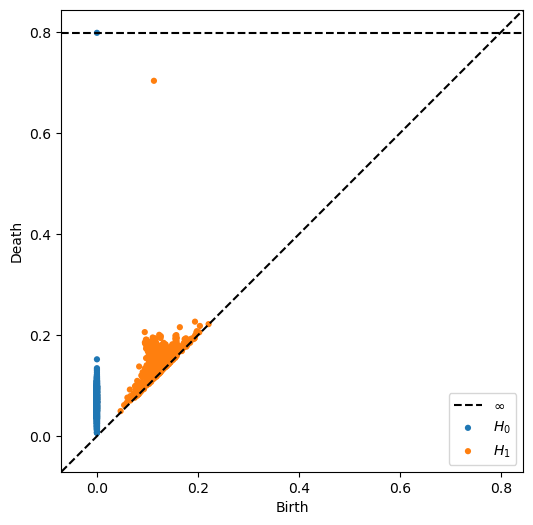

In [421]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [422]:
persistent_H1_intervals(output)

[0.5910786241292953,
 0.11148039996623993,
 0.09434332698583603,
 0.0923442542552948,
 0.09087872505187988,
 0.08845731616020203,
 0.08654621988534927,
 0.08504657447338104,
 0.08423618227243423,
 0.08384352922439575,
 0.08068644255399704,
 0.08026118576526642,
 0.07980623096227646,
 0.07977531850337982,
 0.07911524921655655,
 0.07826736569404602,
 0.07746948301792145,
 0.07654601335525513,
 0.07645555585622787,
 0.07542330771684647,
 0.07437852770090103,
 0.07352486997842789,
 0.07341818511486053,
 0.07225815206766129,
 0.07165007293224335,
 0.07150071859359741,
 0.07118377834558487,
 0.07092811167240143,
 0.07069316506385803,
 0.07061690092086792,
 0.06992855668067932,
 0.06986875832080841,
 0.0690881758928299,
 0.0687815472483635,
 0.06874558329582214,
 0.06864838302135468,
 0.06838715076446533,
 0.06801089644432068,
 0.06768380105495453,
 0.06736278533935547,
 0.06717967242002487,
 0.06682610511779785,
 0.06653878837823868,
 0.06651916354894638,
 0.06571029126644135,
 0.06530795991

### trying C3 again with different origin (shouldn't make a difference )

In [22]:
def distance_C3(x, y, a):
    
    # no translation in rotation axis
    Y = [y] # no translation in any axis
    for i in [1,-1]:
        Y.append((y[0] + i * (3**0.5) * a, y[1], y[2])) # front and back
        Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
        Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
        
    # translate up 
    Y.append((-1/2 * y[0] - (3**0.5)/2 * y[1], -1/2 * y[1] + (3**0.5)/2 * y[0], y[2] + 2*pi/3)) # only rotation by 2pi/3
    for i in [1,-1]:
        y1 = -1/2 * y[0] - (3**0.5)/2 * y[1]
        y2 = -1/2 * y[1] + (3**0.5)/2 * y[0] 
        Y.append((y1 + i * (3**0.5) * a, y2, y[2] + 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    
    
    # translate down 
    Y.append((-1/2 * y[0] + (3**0.5)/2 * y[1], -1/2 * y[1] - (3**0.5)/2 * y[0], y[2] - 2*pi/3)) # only rotation by -2pi/3
    for i in [1,-1]:
        y1 = -1/2 * y[0]+ (3**0.5)/2 * y[1]
        y2 = -1/2 * y[1] - (3**0.5)/2 * y[0]
        Y.append((y1 + i * (3**0.5) * a, y2, y[2] - 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [23]:
def generate_c3_isoms(n_isos, a):
    X = list(2 * a * np.random.random(2 * n_isos) - a)  
    Y = list((3**0.5) * a * np.random.random(2 * n_isos) - (3**0.5)/2 * a)
    theta = list(2*pi/3 * np.random.random(2 * n_isos))
    
    i = 0
    hexagon = []
    while len(hexagon) < n_isos:
        if (Y[i] > -(3**0.5) * a + (3**0.5) * X[i]) and (Y[i] > -(3**0.5) * a - (3**0.5) * X[i]) and (Y[i] < (3**0.5) * a + (3**0.5) * X[i]) and (Y[i] < (3**0.5) * a - (3**0.5) * X[i]):  
            hexagon.append((X[i], Y[i], theta[i]))
        i = i + 1
    
    return hexagon

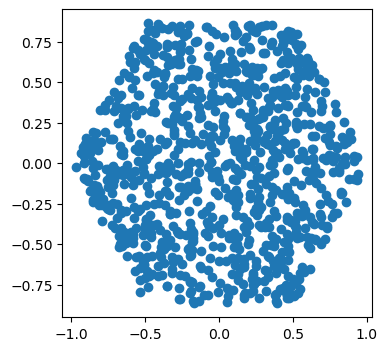

In [24]:
hexagon = generate_c3_isoms(1000, 1)

X = []
Y = []
for i in range(len(hexagon)):
    X.append(hexagon[i][0])
    Y.append(hexagon[i][1])

fig = plt.figure(figsize = (4, 4))
ax = plt.axes()
ax.scatter(X, Y)
plt.show()

In [25]:
isoms = generate_c3_isoms(1000, .5)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C3(isoms[i], isoms[j], .5)

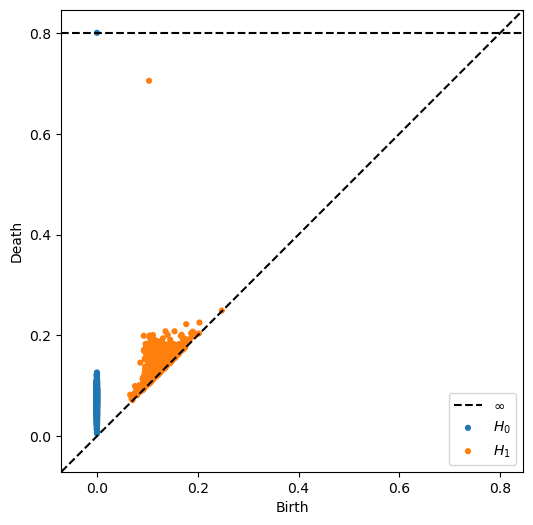

In [26]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [27]:
persistent_H1_intervals(output)

[0.6017486304044724,
 0.10624846071004868,
 0.09489612281322479,
 0.09229705482721329,
 0.08959779888391495,
 0.08953693509101868,
 0.08649231493473053,
 0.08368097245693207,
 0.0836312472820282,
 0.08178631961345673,
 0.08101554960012436,
 0.07900696247816086,
 0.07892870903015137,
 0.07802776247262955,
 0.07790878415107727,
 0.07786331325769424,
 0.07704201340675354,
 0.07695908099412918,
 0.07693091779947281,
 0.07641618698835373,
 0.07593166828155518,
 0.07526130974292755,
 0.07475276291370392,
 0.07351783663034439,
 0.07194192707538605,
 0.07057472318410873,
 0.07042889297008514,
 0.07018116116523743,
 0.06988029927015305,
 0.06965603679418564,
 0.06914929300546646,
 0.06857449561357498,
 0.06814032047986984,
 0.06723739206790924,
 0.06681936234235764,
 0.06654835492372513,
 0.06640978157520294,
 0.06624520570039749,
 0.06618153303861618,
 0.06579353660345078,
 0.06524819880723953,
 0.06491998583078384,
 0.06476334482431412,
 0.06444702297449112,
 0.06422033905982971,
 0.063324436

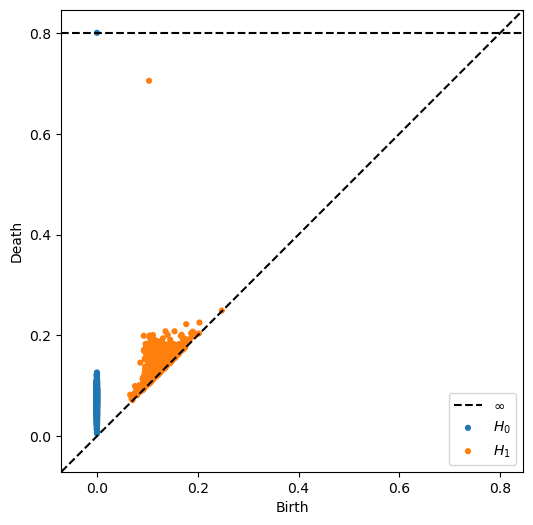

In [28]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [29]:
persistent_H1_intervals(output)

[0.6017486304044724,
 0.10624846071004868,
 0.09489612281322479,
 0.09229705482721329,
 0.08959779888391495,
 0.08953693509101868,
 0.08649231493473053,
 0.08368097245693207,
 0.0836312472820282,
 0.08178631961345673,
 0.08101554960012436,
 0.07900696247816086,
 0.07892870903015137,
 0.07802776247262955,
 0.07790878415107727,
 0.07786331325769424,
 0.07704201340675354,
 0.07695908099412918,
 0.07693091779947281,
 0.07641618698835373,
 0.07593166828155518,
 0.07526130974292755,
 0.07475276291370392,
 0.07351783663034439,
 0.07194192707538605,
 0.07057472318410873,
 0.07042889297008514,
 0.07018116116523743,
 0.06988029927015305,
 0.06965603679418564,
 0.06914929300546646,
 0.06857449561357498,
 0.06814032047986984,
 0.06723739206790924,
 0.06681936234235764,
 0.06654835492372513,
 0.06640978157520294,
 0.06624520570039749,
 0.06618153303861618,
 0.06579353660345078,
 0.06524819880723953,
 0.06491998583078384,
 0.06476334482431412,
 0.06444702297449112,
 0.06422033905982971,
 0.063324436

# C6

In [30]:
def distance_C6(x, y, a):
    
    # no translation in rotation axis
    Y = [y] # no translation in any axis
    for i in [1,-1]:
        Y.append((y[0] + i * (3**0.5) * a, y[1], y[2])) # front and back
        Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
        Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
        
    # translate up 
    Y.append((1/2 * y[0] - (3**0.5)/2 * y[1], 1/2 * y[1] + (3**0.5)/2 * y[0], y[2] + pi/3)) # only rotation by 2pi/3
    for i in [1,-1]:
        y1 = 1/2 * y[0] - (3**0.5)/2 * y[1]
        y2 = 1/2 * y[1] + (3**0.5)/2 * y[0] 
        Y.append((y1 + i * (3**0.5) * a, y2, y[2] + 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + pi/3)) # LF and RB    
    
    # translate down 
    Y.append((1/2 * y[0] + (3**0.5)/2 * y[1], 1/2 * y[1] - (3**0.5)/2 * y[0], y[2] - pi/3)) # only rotation by -2pi/3
    for i in [1,-1]:
        y1 = 1/2 * y[0]+ (3**0.5)/2 * y[1]
        y2 = 1/2 * y[1] - (3**0.5)/2 * y[0]
        Y.append((y1 + i * (3**0.5) * a, y2, y[2] - 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - pi/3)) # LF and RB   
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [32]:
def generate_c6_isoms(n_isos, a):
    X = list(2 * a * np.random.random(2 * n_isos) - a)  
    Y = list((3**0.5) * a * np.random.random(2 * n_isos) - (3**0.5)/2 * a)
    theta = list(pi/3 * np.random.random(2 * n_isos))
    
    i = 0
    hexagon = []
    while len(hexagon) < n_isos:
        if (Y[i] > -(3**0.5) * a + (3**0.5) * X[i]) and (Y[i] > -(3**0.5) * a - (3**0.5) * X[i]) and (Y[i] < (3**0.5) * a + (3**0.5) * X[i]) and (Y[i] < (3**0.5) * a - (3**0.5) * X[i]):  
            hexagon.append((X[i], Y[i], theta[i]))
        i = i + 1
    
    return hexagon

In [33]:
isoms = generate_c6_isoms(1000, .5)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C6(isoms[i], isoms[j], .5)

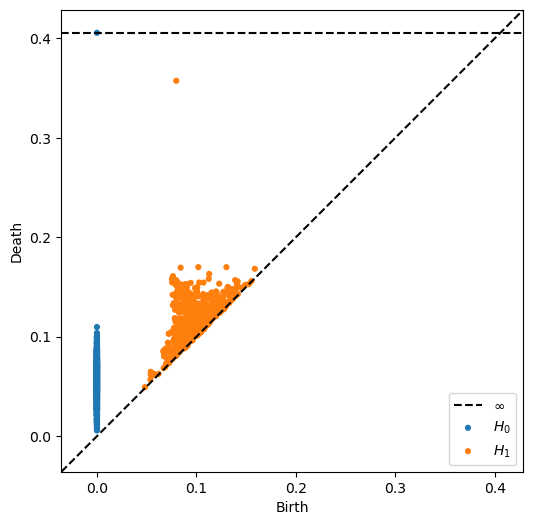

In [34]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [35]:
persistent_H1_intervals(output)

[0.27756134420633316,
 0.08531081676483154,
 0.08440115302801132,
 0.08277890831232071,
 0.07902024686336517,
 0.07718925923109055,
 0.07680784910917282,
 0.07557723671197891,
 0.07409462332725525,
 0.073668472468853,
 0.07261037081480026,
 0.07057985663414001,
 0.06975208967924118,
 0.06838332861661911,
 0.06807241588830948,
 0.06806499511003494,
 0.0676497146487236,
 0.06605136394500732,
 0.06484910845756531,
 0.06477445363998413,
 0.06476831436157227,
 0.06465733051300049,
 0.06360865384340286,
 0.06307948380708694,
 0.062413185834884644,
 0.06231442838907242,
 0.0607910081744194,
 0.060606949031353,
 0.05991104990243912,
 0.05963413417339325,
 0.059562020003795624,
 0.05948641151189804,
 0.05874256789684296,
 0.0581275075674057,
 0.05792240798473358,
 0.057831987738609314,
 0.05731556564569473,
 0.056635938584804535,
 0.05647065490484238,
 0.056431397795677185,
 0.05641397833824158,
 0.05554061383008957,
 0.05538533627986908,
 0.05533721297979355,
 0.05488290637731552,
 0.054854162

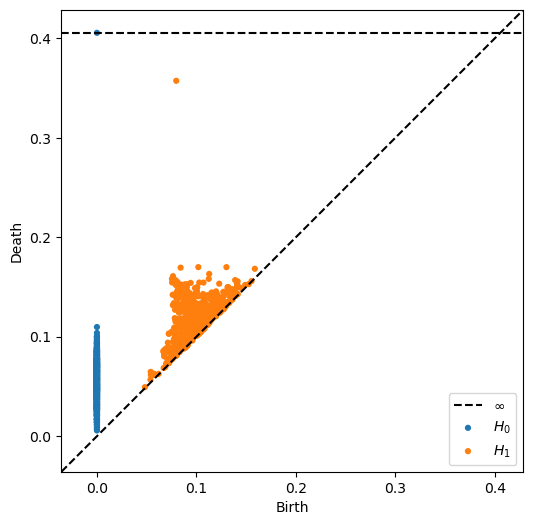

In [36]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [37]:
persistent_H1_intervals(output)

[0.27756134420633316,
 0.08531081676483154,
 0.08440115302801132,
 0.08277890831232071,
 0.07902024686336517,
 0.0777735635638237,
 0.07622354477643967,
 0.07557723671197891,
 0.07409462332725525,
 0.073668472468853,
 0.07261037081480026,
 0.07057985663414001,
 0.06984180957078934,
 0.06838332861661911,
 0.06807241588830948,
 0.06806499511003494,
 0.06755999475717545,
 0.06605136394500732,
 0.06484910845756531,
 0.06477445363998413,
 0.06476831436157227,
 0.06465733051300049,
 0.06360865384340286,
 0.06307948380708694,
 0.062413185834884644,
 0.06231442838907242,
 0.0607910081744194,
 0.060606949031353,
 0.05991104990243912,
 0.05963413417339325,
 0.059562020003795624,
 0.05948641151189804,
 0.05874256789684296,
 0.0581275075674057,
 0.05792240798473358,
 0.057831987738609314,
 0.05731556564569473,
 0.056635938584804535,
 0.05647065490484238,
 0.056431397795677185,
 0.05641397833824158,
 0.05554061383008957,
 0.05538533627986908,
 0.05533721297979355,
 0.05488290637731552,
 0.054854162